In [35]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import cv2
from scipy import stats
import matplotlib.pyplot as plt

In [41]:
db1 = np.load("db_descriptors.npy")
db2 = np.load("test_descriptors.npy")

totalTestSamples = len(db2)

In [37]:
# To create a histogram based on the angles in a database

def drawHistogram(data):
    hist = stats.cumfreq(data, numbins=18, defaultreallimits=(0,180))
    
    x = hist.lowerlimit + np.linspace(0, hist.binsize * hist.cumcount.size, hist.cumcount.size)
    plt.bar(x, hist.cumcount, width=hist.binsize)
    plt.title('Cumulative histogram')
    plt.xlim([x.min(), x.max()])
    plt.show()
    
    return hist

In [38]:
# To print some details of the histogram

def printDetails(histogram_data, no_of_samples):
    bin_count = histogram_data.cumcount
            
    print("Images with Angular difference of 10 degrees or less are: ", (bin_count[0]/no_of_samples) * 100, "%")
    print("Images with Angular difference of 20 degrees or less are: ", (bin_count[2]/no_of_samples) * 100, "%")
    print("Images with Angular difference of 40 degrees or less are: ", (bin_count[4]/no_of_samples) * 100, "%")
    print("Images with Angular difference of 180 degrees or less are: ", (bin_count[17]/no_of_samples) * 100, "%")    

In [39]:
# Manual impleentation of a Brute Force matcher

def NNMatcher(database1, database2):
    angles = []
    
    for index1, descriptor1 in enumerate(database1):
        d = 100000
        testObjectType = descriptor1[1]
        angle = 0
        for index2, descriptor2 in enumerate(database2):
            d1 = descriptor1[0]
            d2 = descriptor2[0]
                
            dist = np.linalg.norm(d1 - d2)
                
            if dist < d:
                d = dist
                index = index2
                dbObjectType = descriptor2[1]
                    
        if testObjectType == dbObjectType:
            angle = 57.26 * np.arccos((np.dot(d1, d2) / (np.linalg.norm(d1) * np.linalg.norm(d2))))
            angles.append(angle)
                
        #print("Match for descriptor: ", index1, " of type: ", testObjectType, " is: ", index, 
         #     " of class: ", dbObjectType, " and angle is: ", angle)
    
    histogram = drawHistogram(angles)
    printDetails(histogram, totalTestSamples)

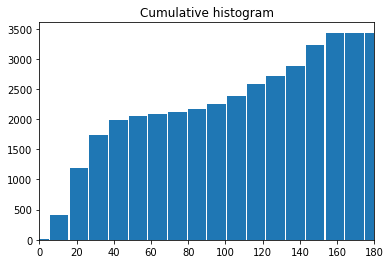

Images with Angular difference of 10 degrees or less are:  0.141242937853 %
Images with Angular difference of 20 degrees or less are:  33.7853107345 %
Images with Angular difference of 40 degrees or less are:  56.3276836158 %
Images with Angular difference of 180 degrees or less are:  96.9774011299 %


In [42]:
NNMatcher(db2, db1)